## Vasopressors vs. blood pressure over time

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 4H aggregated dataset (Roggeveen et al., 2021)

In [5]:
df_aggr_4h = pd.read_csv('../preprocessing/datasets/mimic-iii/aggregated_4h/mimic-iii_valid.csv')

# select random episode from validation set (in which vasopressor was administered!)
episode_id = random.choice(df_aggr_4h.episode.unique())
while df_aggr_4h[df_aggr_4h.episode == episode_id].max_vaso.max() == 0:
    episode_id = random.choice(df_aggr_4h.episode.unique())
#episode_id = 261383

print('Episode:', episode_id)

# limit to said episode
df_aggr_4h = df_aggr_4h[df_aggr_4h.episode == episode_id]

Episode: 299879


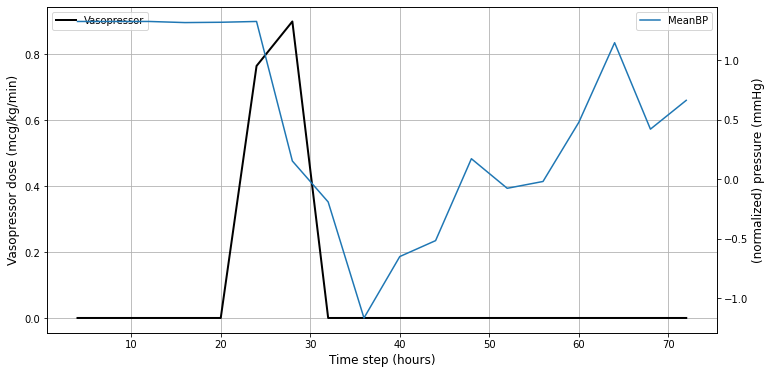

In [6]:
# Extract series of max vaso therapy and blood pressure measurements (normalized!)
max_vaso = df_aggr_4h.max_vaso
mean_bp = df_aggr_4h.x11
t = np.linspace(4, 72, mean_bp.shape[0])

fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(zorder=-1)

ax.plot(t, max_vaso, color='k', linewidth=2, label='Vasopressor')
ax.set_xlabel('Time step (hours)', fontsize='large')
ax.set_ylabel('Vasopressor dose (mcg/kg/min)', fontsize='large')
ax.legend(loc=2)

ax2 = ax.twinx()
ax2.set_ylabel('(normalized) pressure (mmHg)', fontsize='large')
ax2.plot(t, mean_bp, linestyle='-', label='MeanBP')
ax2.legend(loc=0)

plt.show()

At 24h, in a state where everything seems to still be alright (i.e. the patient has a normal blood pressure), the patient receives vasopressors?

### 1H Aggregated dataset

Lots can change in 4 hours, therefore we may be registering the consequences of our actions in the state itself! Let's reduce the aggregation window to 1 hour

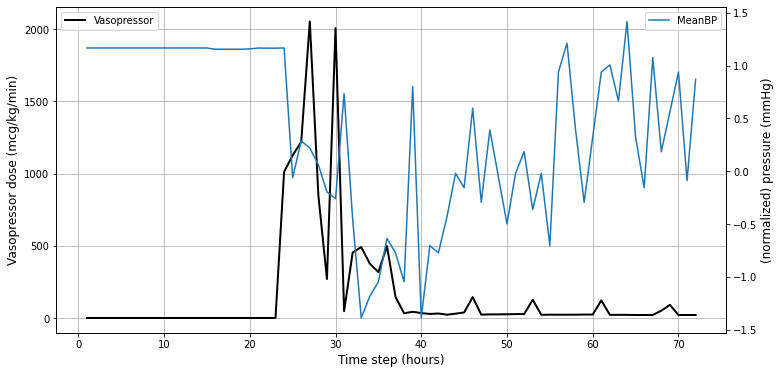

In [22]:
df_aggr_1h = pd.read_csv('../preprocessing/datasets/mimic-iii/aggregated_1h/mimic-iii_valid.csv')

# limit to episode
df_aggr_1h = df_aggr_1h[df_aggr_1h.episode == episode_id]

# Extract series of max vaso therapy and blood pressure measurements (normalized!)
max_vaso = df_aggr_1h.total_iv_fluid
mean_bp = df_aggr_1h.x11
t = np.linspace(1, 72, mean_bp.shape[0])

fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(zorder=-1)

ax.plot(t, max_vaso, color='k', linewidth=2, label='Vasopressor')
ax.set_xlabel('Time step (hours)', fontsize='large')
ax.set_ylabel('Vasopressor dose (mcg/kg/min)', fontsize='large')
ax.legend(loc=2)

ax2 = ax.twinx()
ax2.set_ylabel('(normalized) pressure (mmHg)', fontsize='large')
ax2.plot(t, mean_bp, linestyle='-', label='MeanBP')
ax2.legend(loc=0)

plt.show()

**Conclusion:** peaks much higher; troughs much deeper. Small "bumps" in treatment (treatment adjustments) missed through smoothing by aggregation over overly large 4 hour bins

### 1H Non-aggregated dataset

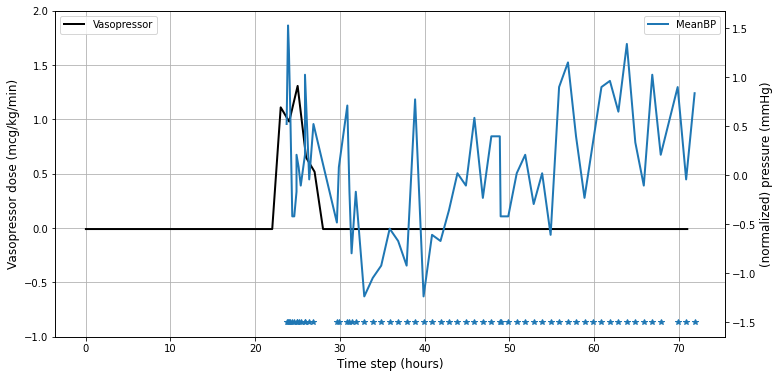

In [21]:
df_nonaggr_1h = pd.read_csv('../preprocessing/datasets/mimic-iii/non_aggregated_1h/mimic-iii_valid.csv')

# limit to same episode
df_nonaggr_1h = df_nonaggr_1h[df_nonaggr_1h.episode == episode_id]

fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(zorder=-1)
    
df_vaso = df_nonaggr_1h[df_nonaggr_1h.x0 == 44]
ax.plot(df_vaso.x2 - 1, df_vaso.x1 + 0.12, color='k', linewidth=2, label='Vasopressor')  # undo time offset
ax.set_xlabel('Time step (hours)', fontsize='large')
ax.set_ylabel('Vasopressor dose (mcg/kg/min)', fontsize='large')
ax.set_ylim(-1, 2)
ax.legend(loc=2)

ax2 = ax.twinx()
ax2.set_ylabel('(normalized) pressure (mmHg)', fontsize='large')
df_feature = df_nonaggr_1h[df_nonaggr_1h.x0 == 30] # meanBP
ax2.plot(df_feature.x2, df_feature.x1, linestyle='-', color='C0', linewidth=2, label='MeanBP')  
ax2.plot(df_feature.x2, 0 * df_feature.x1 - 1.5, marker='*', color='C0', linestyle='', linewidth=2)
ax2.legend(loc=0)

plt.show()

Imputation was the problem, we did not have the measurements we needed therefore mean imputation imagined the patient to be alright (the patient was likely admitted to ICU with suspicion of infection at $t=24$ explaining why there were no measurements before this time).

Note that this plot starts at $t=0$, not $t=1$, as the non-aggregated dataset is more akin to forecasting, i.e. *given the observations up to now, what should the physician do in the next hour or so?*